# 1. Importar Librerias

In [3]:
# Librerias manipulación de datos
import calendar
import numpy as np
import pandas as pd
import requests
import sys
import os
import time

# Visualitation Modules 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from datetime import *

# Estadística
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF

# Sklearn models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pd.options.display.float_format = '{:,.2f}'.format

# 2. Cargar CVS

In [4]:
sys.path.insert(0, 'C:/Users/Angello/Documents/DataScienceChallenge/files')
data_csv = pd.read_csv('C:/Users/Angello/Documents/DataScienceChallenge/files/dataset_SCL.csv')
data_csv

C:\Users\Angello\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.00,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.00,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.00,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.00,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


# 3. Data Wrangling

In [5]:
# Se crea una copia de los datos para trabajar sobre ellos

df = data_csv.copy(deep=True)

# La data cuenta con 68206 filas y 19 columnas

df.shape

(68206, 18)

In [6]:
df.describe()

,DIA,MES,AÑO
count,"68,206.00","68,206.00","68,206.00"
mean,15.71,6.62,"2,017.00"
std,8.78,3.52,0.01
min,1.00,1.00,"2,017.00"
25%,8.00,3.00,"2,017.00"
50%,16.00,7.00,"2,017.00"
75%,23.00,10.00,"2,017.00"
max,31.00,12.00,"2,018.00"


In [7]:
df.describe(include='all')

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,"68,206.00","68,206.00","68,206.00",68206,68206,68206,68206,68206
unique,53252,750,1,64,30,62774,866,1,63,32,NaN,NaN,NaN,7,2,23,1,62
top,2017-07-28 13:30:00,174,SCEL,SCFA,LAN,2017-11-05 14:51:00,174,SCEL,SCFA,LAN,NaN,NaN,NaN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68206,5787,37611,5,649,68206,5786,20988,NaN,NaN,NaN,10292,36966,40892,68206,6335
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.71,6.62,"2,017.00",NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.78,3.52,0.01,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,"2,017.00",NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,3.00,"2,017.00",NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00,7.00,"2,017.00",NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.00,10.00,"2,017.00",NaN,NaN,NaN,NaN,NaN


In [9]:
# Ver tipo de variables y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


### Convertir datos

In [10]:
# Convertir tipos de datos de manera automática
df = df.convert_dtypes()
df.dtypes

Fecha-I      string
Vlo-I        object
Ori-I        string
Des-I        string
Emp-I        string
Fecha-O      string
Vlo-O        object
Ori-O        string
Des-O        string
Emp-O        string
DIA           Int64
MES           Int64
AÑO           Int64
DIANOM       string
TIPOVUELO    string
OPERA        string
SIGLAORI     string
SIGLADES     string
dtype: object

In [11]:
# Se realiza el cambio manual con las columnas que no cambiaron
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])
df['TIPOVUELO'] = df['TIPOVUELO'].astype('category')

# Se comprueba que el cambio se hizo correctamente
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                string
Des-I                string
Emp-I                string
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                string
Des-O                string
Emp-O                string
DIA                   Int64
MES                   Int64
AÑO                   Int64
DIANOM               string
TIPOVUELO          category
OPERA                string
SIGLAORI             string
SIGLADES             string
dtype: object

## Creación de columna de Indicador de Atraso
- La siguiente columna sera creada para marcar aquellos vuelos que se atrasaron (1: Atraso, 0: No Atraso)
- Esta columna es necesaria para generar el analisis de los atrasos, asi como para crear las visualizaciones necesarias del EDA


In [12]:
df.loc[df['Fecha-I'] < df['Fecha-O'], 'Ind_Atraso'] = 1
df.loc[df['Fecha-I'] >= df['Fecha-O'], 'Ind_Atraso'] = 0

df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Ind_Atraso
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1.00
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1.00
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1.00
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1.00
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.00,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1.00
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.00,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1.00
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.00,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1.00
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.00,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1.00


### Creación columna dif_min

---------------------
Resultados del ajuste
---------------------
Distribución:   norm
Dominio:        [-inf, inf]
Parámetros:     {'loc': 9.110855349969212, 'scale': 19.313245426020767}
Log likelihood: -298723.8429107194
AIC:            597451.6858214388
BIC:            597469.9463970718


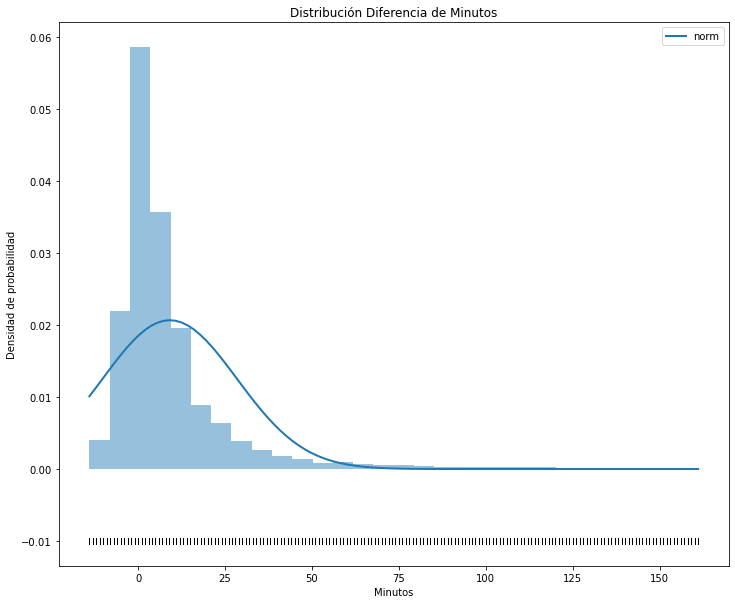

In [14]:
df_c = df['dif_min']

# Ajuste distribución normal
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.norm

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=df_c)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(df_c.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
# Log verosimilitud , AIC:
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(df_c.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(df_c), max(df_c), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=df_c, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(df_c, np.full_like(df_c, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución Diferencia de Minutos')
ax.set_xlabel('Minutos')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")
print(f"Log likelihood: {log_likelihood}")
print(f"AIC:            {aic}")
print(f"BIC:            {bic}")

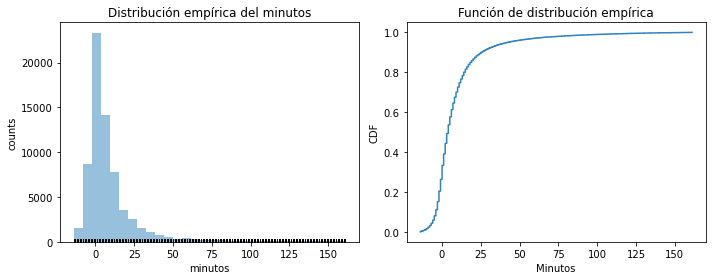

In [22]:
# Distribución de datos

# Gráficos distribución observada (empírica)
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Histograma
axs[0].hist(x=df_c, bins=30, color="#3182bd", alpha=0.5)
axs[0].plot(df_c, np.full_like(df_c, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución empírica del minutos')
axs[0].set_xlabel('minutos')
axs[0].set_ylabel('counts')

# Función de Distribución Acumulada
# ecdf (empirical cumulative distribution function)
ecdf = ECDF(x=df_c)
axs[1].plot(ecdf.x, ecdf.y, color="#3182bd")
axs[1].set_title('Función de distribución empírica')
axs[1].set_xlabel('Minutos')
axs[1].set_ylabel('CDF')

plt.tight_layout();

In [17]:
df.groupby(['OPERA']).mean().sort_values('dif_min', ascending=False)

,DIA,MES,AÑO,Ind_Atraso,dif_min
OPERA,,,,,
Plus Ultra Lineas Aereas,15.98,8.73,"2,017.00",0.86,31.71
Qantas Airways,15.94,6.47,"2,017.00",0.91,26.84
Latin American Wings,15.98,7.45,"2,017.00",0.75,24.57
Air Canada,15.40,6.31,"2,017.00",0.78,22.91
Gol Trans,15.35,6.75,"2,017.00",0.58,11.91
Avianca,15.67,5.92,"2,017.00",0.57,11.13
Aerolineas Argentinas,15.60,6.68,"2,017.00",0.59,10.00
Grupo LATAM,15.67,6.50,"2,017.00",0.74,9.47
Sky Airline,15.76,6.59,"2,017.00",0.59,8.12


In [20]:
df.groupby(['MES']).mean()

,DIA,AÑO,Ind_Atraso,dif_min
MES,,,,
1,16.17,"2,017.00",0.66,7.77
2,14.38,"2,017.00",0.65,7.54
3,15.80,"2,017.00",0.57,5.76
4,15.44,"2,017.00",0.59,5.77
5,15.91,"2,017.00",0.64,7.52
6,15.52,"2,017.00",0.65,8.54
7,16.15,"2,017.00",0.77,15.37
8,15.95,"2,017.00",0.65,8.62
9,15.53,"2,017.00",0.65,8.50
